# A Beginner Visualizing Goalkeeper Performance in the Premier League - Part 2 of 3

In [2]:
from adjustText import adjust_text
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
%matplotlib inline

## 1. Data preparation

Load in our data

In [3]:
#normal stats including save%, clean sheets and penalty saves
df_stats = pd.read_csv(r"data/epl_gk_stats.csv", index_col="Rk")
#"C:\Users\rcr1\Desktop\GoalkeepersSoFar_19-20\data\epl_gk_adv_stats.csv"

#advanced stats including crosses, goal kicks and passes
df_adv_stats = pd.read_csv(r"data/epl_gk_adv_stats.csv", index_col="Rk")

General information about dataset

In [4]:
#general information about our data set
#df_adv_stats.head()

### 1.1. Cleaning dataset

Fill empty cells

In [5]:
df_stats.isnull().sum()
df_stats.fillna(0.5, inplace=True)

Remove GK's with less than 600 minutes played

In [6]:
df_stats = df_stats.drop(df_stats[df_stats["Min"] < 600].index)

df_adv_stats = df_adv_stats.drop(df_adv_stats[df_adv_stats["90s"] < 7].index)

Remove double Player name

In [7]:
#clean player names
df_stats["Player"] = [name.split("\\")[0] for name in df_stats["Player"]]
df_adv_stats["Player"] = [name.split("\\")[0] for name in df_adv_stats["Player"]]

### 1.2. Calculating metrics

In [8]:
#saves per match
df_stats["Sv/90"] = df_stats["Saves"] / (df_stats["Min"]/90)

#saves per goal
df_stats["Sv/GA"] = df_stats["Saves"] / df_stats["GA"]

#xSv%
df_stats["xSv%"] = ((df_stats["SoTA"] - df_adv_stats["PSxG"])/df_stats["SoTA"])*100

#aSv%
df_stats["aSv%"] = ((df_stats["Save%"]*100) - df_stats["xSv%"])

df_stats["xSv%"]

Rk
1     71.200000
2     74.848485
3     62.537313
5     66.721311
6     66.551724
7     69.714286
9     62.700000
10    69.066667
11    70.470588
12    66.746988
13    64.150943
14    64.646465
15    71.298701
17    64.476190
18    69.385965
21    61.851852
25    68.500000
26    65.543478
27    68.900000
28    65.151515
31    66.274510
32    66.666667
33    68.452381
Name: xSv%, dtype: float64

## 2. Data analysis 

### 1.1. xSv% (expected Sv%)

findfont: Font family ['Corbel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Corbel'] not found. Falling back to DejaVu Sans.


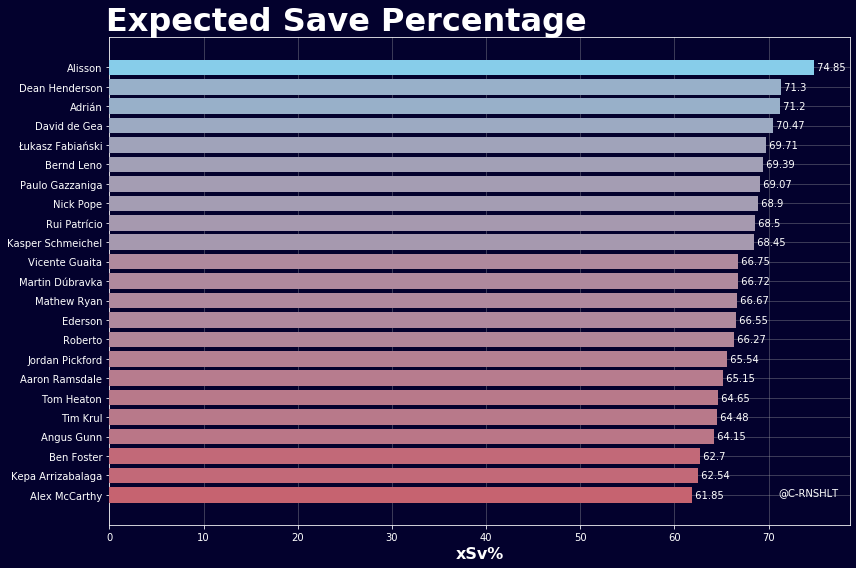

In [9]:
#sort 1st plot
x = df_stats.sort_values("xSv%")["Player"]
y = df_stats.sort_values("xSv%")["xSv%"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 100 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("xSv%",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("Expected Save Percentage", 
             x=0.32, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+70, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

#plt.savefig("output/EPL_xSv_barh.png", dpi=300,facecolor="#03012d");

### 1.2. xSv% and Sv%

Expected save percentage doesn't tell how the goalkeeper actually performed, but what was expected for him to have performed given the shots he has faced so far this season.

Therefore we need to compare this to the goalkeepers given Sv%, first in a in two sided bar plot.

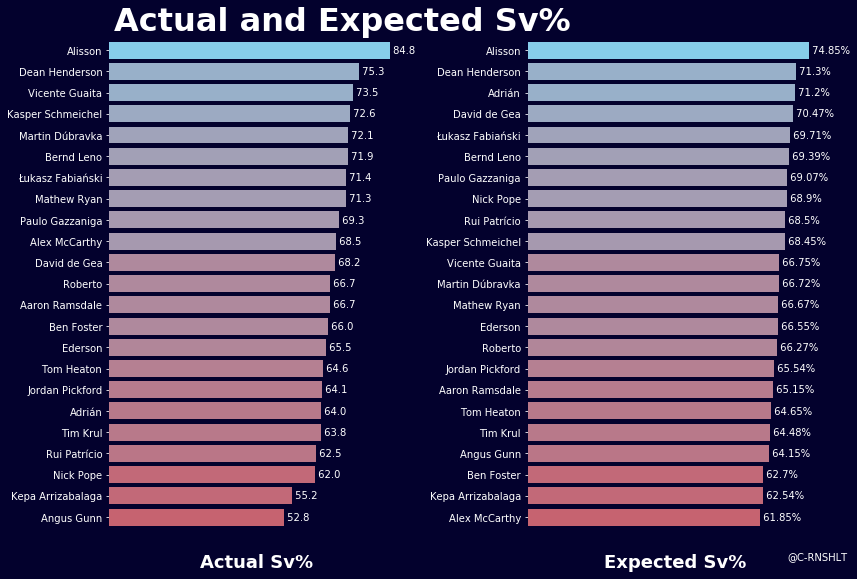

In [11]:
#sort 1st plot
x1 = df_stats.sort_values("Save%")["Player"]
y1 = df_stats.sort_values("Save%")["Save%"]*100

#sort 2nd plot
x2 = df_stats.sort_values("xSv%")["Player"]
y2 = df_stats.sort_values("xSv%")["xSv%"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N1 = 8 #highest value on x-axis (ax1) 
N2 = 45 #highest value on x-axis (ax2)

#create plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()

#plot 1st subplot
ax1.barh(x1, y1, color=rvb(y/N), zorder=3)

#plot 2nd subplot
ax2.barh(x2, y2,color=rvb(y/N), zorder=3)

#set background colour
fig.set_facecolor("#03012d")

#add title text
fig.suptitle("Actual and Expected Sv%", 
             x=0.40, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")
ax1.set_xlabel("Actual Sv%",
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")
ax2.set_xlabel("Expected Sv%", 
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y1):
    ax1.text(value, i, " "+str(round(value, 2)), color="white", va="center")
for i, value in enumerate(y2):
    ax2.text(value, i, " "+str(round(value, 2))+"%", color="white", va="center")

#remove spines and xticks
ax1.set_frame_on(False)
ax1.tick_params(axis="y", colors="white")
ax1.set_xticks([])

ax2.set_frame_on(False)
ax2.tick_params(axis="y", colors="white")
ax2.set_xticks([])

#add signature
ax2.text(xmax+68, ymin-2, "@C-RNSHLT", color="white")

plt.tight_layout()

plt.savefig("output/EPL_actualSv%_xSv%_barh.png", dpi=300, facecolor="#03012d");

### 1.x. aSv% (adjusted Sv%) 

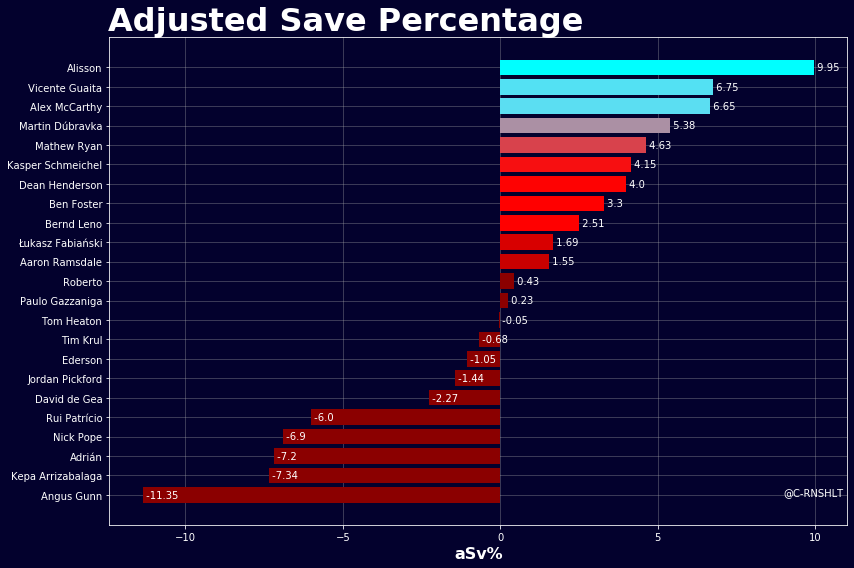

In [22]:
#sort 1st plot
x = df_stats.sort_values("aSv%")["Player"]
y = df_stats.sort_values("aSv%")["aSv%"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 8 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("aSv%",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("Adjusted Save Percentage", 
             x=0.32, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+8, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

#plt.savefig("output/EPL_aSv_barh.png", dpi=300,facecolor="#03012d");

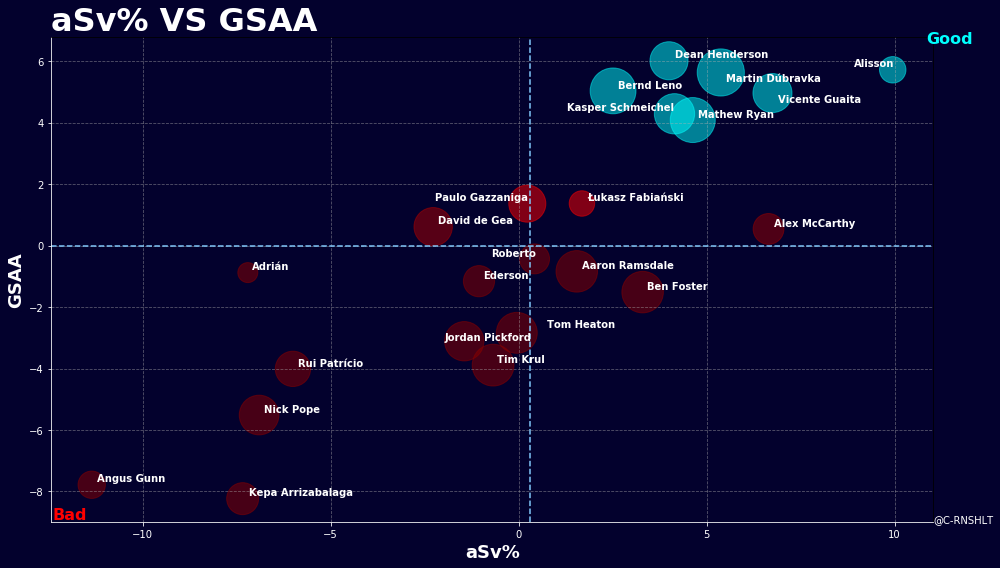

In [25]:
x = df_stats["aSv%"]
y = df_stats["GSAA"]
z = df_stats["Saves"]*25
names = df_stats["Player"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 3.8 #highest value on y or x axis

#plot save% vs CS%
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(x, y, s=z,
            color=rvb(y/N), alpha=0.5)

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#add mean lines and grid
ax.axvline(x.mean(), linestyle='--', color="#82cafc")
ax.axhline(y.mean(), linestyle='--', color="#82cafc")
ax.grid(linestyle="--", alpha=0.5)

#adding text
ax.set_xlabel("aSv%", 
              color="white", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_ylabel("GSAA", 
              color="white", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_title("aSv% VS GSAA", 
             color="white", fontsize=32, loc="left", fontname="Corbel", fontweight="bold")

#get values for plotting text
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

#shading
saves_match = np.linspace(x.min(), x.max(), 1000)
saves_GA = np.linspace(y.min(), y.max(), 1000)

#add text/grid inside plot
#bottom left
ax.text(xmin+0.05, ymin+0.1, 
        "Bad", fontsize=16, fontname="Corbel", fontweight="bold", color="red")
#top right
ax.text(xmax-0.2, ymax-0.2, 
        "Good", fontsize=16, fontname="Corbel", fontweight="bold", color="cyan")

#change colour of axis and ticks
ax.tick_params(axis="both", colors="white")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")

#Create labels for each GK
text = [ax.annotate(txt, xy = (x.iloc[i]+0.08, y.iloc[i]), color="white", fontweight="semibold") 
        for i, txt in enumerate(names)]
                #txt is the text added, xy is coordinates of location

adjust_text(text)

#add signature
ax.text(xmax, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()
#plt.savefig("output/EPL_aSV_GSAA_bubble.png", dpi=300, facecolor="#03012d")